In [30]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
%matplotlib inline

import random
import pandas as pd
import numpy as np

import pickle

In [40]:
n_genotypes = {
    'denv1_ramp': 3,
    'denv2_ramp': 6,
    'denv3_ramp': 4,
    'denv4_ramp': 3
}

colors = { 
'cmap': 'viridis',
'denv1': '#AA4488',
'denv2': '#4477AA',
'denv3': '#44AA77',
'denv4': '#AAAA44',

# anchor colors, number of genotypes
'denv1_ramp': ['#f9cfeb','#CC99BB', '#AA4488', '#771155', '#59073d'],
'denv2_ramp': ['#b6d8f9','#77AADD', '#4477AA', '#114477', '#05305b'],
'denv3_ramp': ['#bcf2d7','#88CCAA', '#44AA77', '#117744', '#02562c'],
'denv4_ramp': ['#f4f4a4','#DDDD77', '#AAAA44', '#777711'],
    
'all_effects': '#DD7788',
'interserotype_effects': '#44AAAA'
}

for serotype in range(1,5): ## generate color map from list of discrete colors
    ramp = 'denv%d_ramp'%serotype
    discreteColors = colors[ramp]
    N=n_genotypes[ramp]
    colors[ramp] = LinearSegmentedColormap.from_list(ramp, discreteColors, N=N)

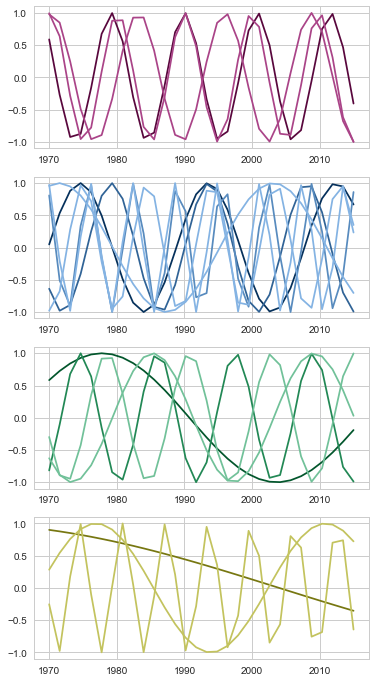

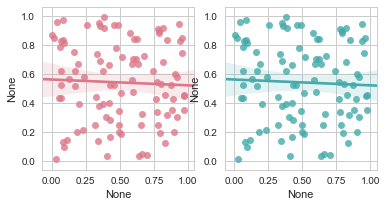

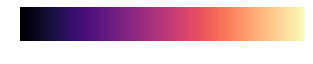

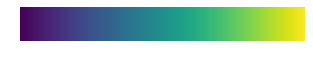

In [44]:
## Demo serotype colors
fig, axes = plt.subplots(4,1, figsize=(6,12))
for serotype, ax in zip(['denv1_ramp', 'denv2_ramp', 'denv3_ramp', 'denv4_ramp'], axes.flatten()):
    cmap = colors[serotype]
    for i in range(n_genotypes[serotype]):
        x = pd.Series(np.linspace(1970, 2015, 30))
        factor=random.random()
        y = pd.Series([np.sin(xi*factor) for xi in x])
        ax.plot(x,y,c=cmap(1./(i+1.)))

plt.show()

## Demo all-effects vs. interserotype-effects colors
x = pd.Series([random.random() for x in range(100)])
y = pd.Series([random.random() for y in range(100)])

sns.set(style='whitegrid')

fig, axes = plt.subplots(1,2, figsize=(6,3))
sns.regplot(x,y,color=colors['all_effects'], ax=axes[0])
sns.regplot(x,y, color=colors['interserotype_effects'], ax=axes[1])
plt.show()


## Demo titer cmap
fig, ax = plt.subplots(1, figsize=(5,0.5))
fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap('magma'))
ax.set_axis_off()
plt.show()


fig, ax = plt.subplots(1, figsize=(5,0.5))
fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)

gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))
ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(colors['cmap']))
ax.set_axis_off()
plt.show()

